In [19]:
import pandas as pb
import numpy as np
import csv
import json
data=pb.read_csv(r"F:\Minor\CTI\first\train.csv",names=['P1','P2'],dtype=np.int32)  
l=[]
l3=[]
for i in data['P1']:
    l.append(i)
for i in data['P2']:
    l3.append(i)
l1=set(l)
l2=set(l3)
l5=l2.union(l1)
freq={}
states=[]
for item in l: 
        freq[item]=l.count(item)
for key, value in freq.items():
        states.append(key)
for i in l5:
    if(states.count(i)==0):
        states.append(i)
rows,cols=(684,684)
arr = [[0 for i in range(cols)] for j in range(rows)] 
data.to_json('train.json')
with open('train.json') as f:
    d=json.load(f)
#print(type(d['P1']['0']))
for (i,j),(x,y) in zip(d['P1'].items(),d['P2'].items()):
        arr[j][y]+=1

In [20]:
for j in freq.keys():
    for i in range(0,684):
        arr[j][i]=np.true_divide(arr[j][i],freq[j])

In [21]:
for i in range(0,684):
    count=0
    for j in range(0,684):
        count+=arr[i][j]
    print(count)

0
1.0000000000000004
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999997
0.9999999999999999
1.0
1.0
0.9999999999999998
0.9999999999999999
0.9999999999999997
1.0
1.0
0.9999999999999999
0.9999999999999994
0.9999999999999999
1.0
1.0
1.0
0.9999999999999998
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
0.9999999999999996
1.0
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999998
0.9999999999999999
0.9999999999999999
1.0000000000000004
1.0000000000000002
1.0
0.9999999999999997
1.0
1.0
1.0
0.9999999999999996
1.0
0
0.9999999999999999
1.0
1.0000000000000016
1.0000000000000013
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0
1.0
1.0
1.0
1.0
0
0
1.0
1.0
0.9999999999999999
1.0
0.9999999999999998
1.0
0
1.0
1.0
1.0
1.0
1.0
0.9999999999999998
1.0
1.0
1.0
1.0
0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999998
1.0
1.0
1.0
0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [22]:
def predict(k):
    max=0
    page=0
    for i in range(0,684):
        if max < arr[k][i]:
            max=arr[k][i]
            page=i
    return page

In [23]:
predict(72)

187

In [24]:
test=pb.read_csv(r"F:\Minor\CTI\first\test.csv",names=['P1','P2'],dtype=np.int32)
test.to_json("test.json")
with open("test.json") as f:
    t=json.load(f)

In [25]:
import matplotlib.pyplot as plt
correct=0
incorrect=0
for (i,j),(x,y) in zip(t['P1'].items(),t['P2'].items()):
    if predict(j)==y:
        correct+=1
    else:
        incorrect+=1
print(correct,incorrect)

1254 2476


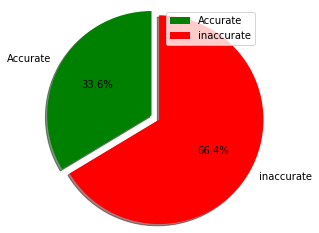

In [26]:
sli=[correct,incorrect]
acti=['Accurate','inaccurate']
col=['g','r']
plt.pie(sli, labels = acti, colors=col,  
        startangle=90, shadow = True, explode = ( 0, 0.1), 
        radius = 1.2, autopct = '%1.1f%%')
plt.legend()
plt.show()

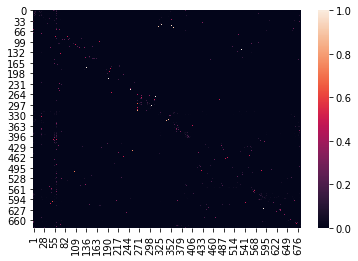

In [30]:
state=[]
for i in range(1,685):
    state.append(i)
states=set(state)
import seaborn as sns
df=pb.DataFrame(arr,columns=state)
p1=sns.heatmap(df)